<a href="https://colab.research.google.com/github/FernandoCerriteno/Portafolio-de-analisis/blob/main/Estad%C3%ADstica%20avanzada/Series_temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python.__version__

/bin/bash: line 1: python.__version__: command not found


In [ ]:
import numpy as np
from statsmodels.api import Poisson
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller

<h2>Parte 1 Exploracion inicial de los
datos

In [ ]:
data = pd.DataFrame(pd.read_csv("/content/dow_jones_index.data", header=0, parse_dates=[0], index_col=[2], infer_datetime_format=True))

In [ ]:
df = data.drop(['quarter','stock','open','close','percent_change_volume_over_last_wk','previous_weeks_volume', 'next_weeks_open', 'next_weeks_close', 'percent_change_next_weeks_price', 'days_to_next_dividend', 'percent_return_next_dividend'], axis=1)

In [ ]:
df.groupby(df.index).count()

,high,low,volume,percent_change_price
date,,,,
1/14/2011,30,30,30,30
1/21/2011,30,30,30,30
1/28/2011,30,30,30,30
1/7/2011,30,30,30,30
2/11/2011,30,30,30,30
2/18/2011,30,30,30,30
2/25/2011,30,30,30,30
2/4/2011,30,30,30,30
3/11/2011,30,30,30,30


In [ ]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
               '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
               '2011-03-04', '2011-03-11',
               ...
               '2011-04-21', '2011-04-29', '2011-05-06', '2011-05-13',
               '2011-05-20', '2011-05-27', '2011-06-03', '2011-06-10',
               '2011-06-17', '2011-06-24'],
              dtype='datetime64[ns]', name='date', length=750, freq=None)

In [ ]:
ds = df.index.to_series()

In [ ]:
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

In [ ]:
df = df.sort_index()
df.high = df.high.str.replace('$', '', regex=True)
df.low = df.low.str.replace('$', '', regex=True)

In [ ]:
df.high = df.high.astype(float)
df.low = df.low.astype(float)

In [ ]:
df = df.groupby(df.index).mean()

In [ ]:
df['2011']

<ipython-input-46-7a650ef42ac8>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2011']


,high,low,volume,percent_change_price,MONTH,DAY_OF_WEEK,DAY
date,,,,,,,
2011-01-07,52.394333,50.535000,1.641992e+08,0.533190,1.0,4.0,7.0
2011-01-14,52.315333,50.572000,1.090246e+08,1.322282,1.0,4.0,14.0
2011-01-21,52.934333,51.229333,1.223585e+08,0.156960,1.0,4.0,21.0
2011-01-28,53.713667,51.400333,1.507353e+08,-0.597219,1.0,4.0,28.0
2011-02-04,53.592333,51.746333,1.199585e+08,2.099038,2.0,4.0,4.0
2011-02-11,54.679333,52.763000,1.371438e+08,0.922095,2.0,4.0,11.0
2011-02-18,54.773000,53.369667,8.658673e+07,0.994382,2.0,4.0,18.0
2011-02-25,54.817667,52.432667,1.141245e+08,-1.331562,2.0,4.0,25.0
2011-03-04,54.496333,52.576667,1.204931e+08,-0.174938,3.0,4.0,4.0


<h2> Parte 2
Visualización de datos

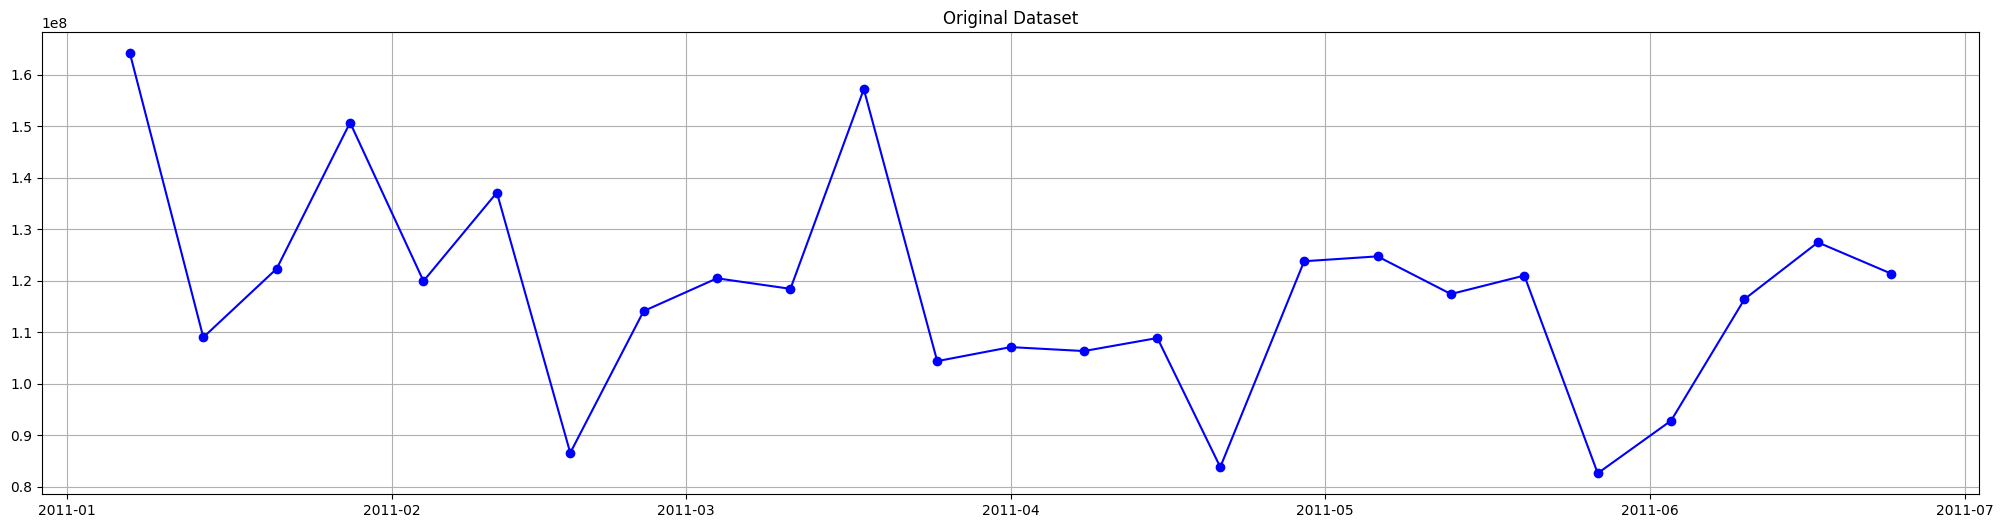

In [ ]:
fig = plt.figure(figsize = (25,6))
plt.plot(df.index, df['volume'], 'bo-', label='Actual counts')
plt.title('Original Dataset')
plt.grid()
plt.show()

Estacionariedad

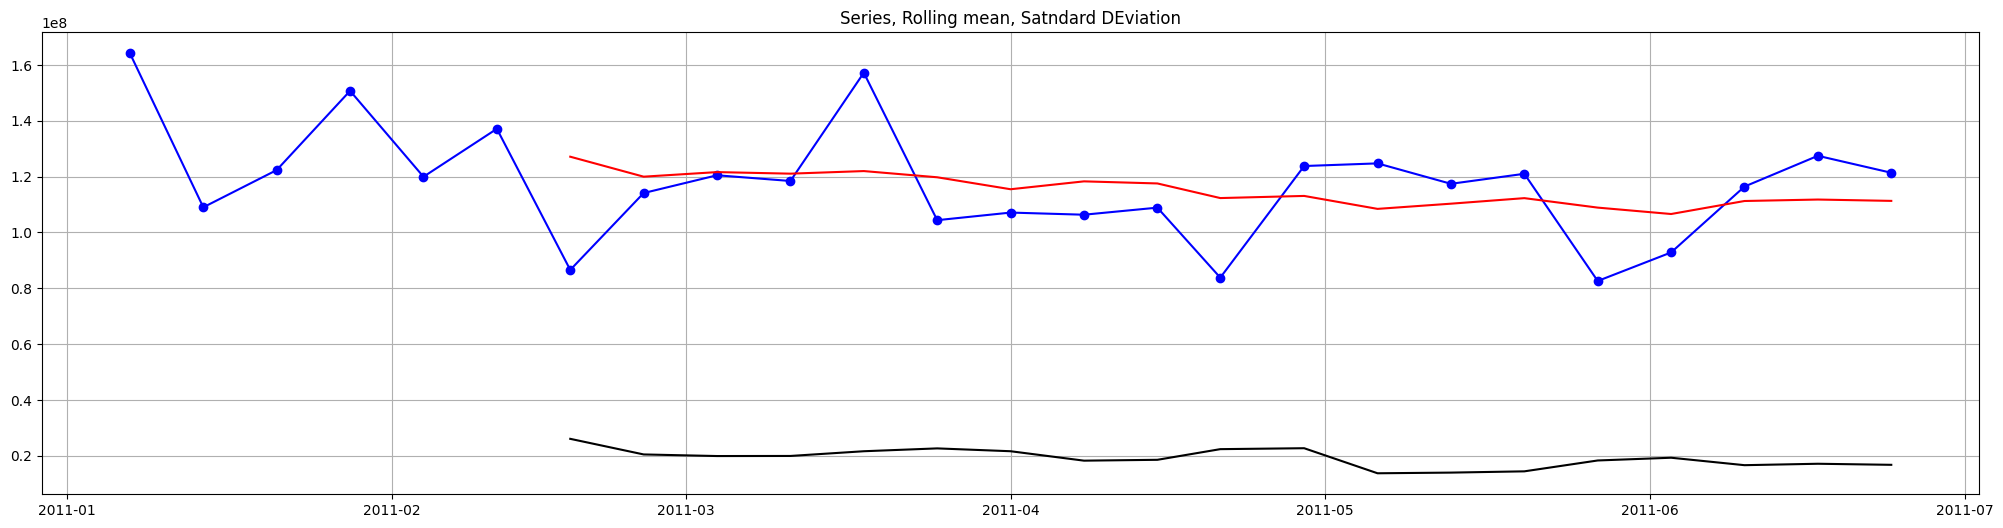

In [ ]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

fig = plt.figure(figsize = (25,6))

og = plt.plot(df.index, df['volume'],'bo-', label='Original Data')
roll_mean = plt.plot(rolling_mean.index, rolling_mean['volume'],'r-', label='Rolling mean')
roll_std = plt.plot(rolling_std.index, rolling_std['volume'],'k-', label='Rolling std')

plt.title('Series, Rolling mean, Satndard DEviation')
# plt.legend(handles=[og, roll_mean, roll_std], loc="best")
plt.grid()
plt.show()

<h2>Parte 3 Prueba de Dicky-Fuller

In [ ]:
adf = adfuller(df['volume'], maxlag=1)

In [ ]:
print("T-Test (Test Statistic):",adf[0],'\n')
print("P-value:",adf[1],"\n")
print("Valores criticos (Critical value):",adf[4])

T-Test (Test Statistic): -5.26849555635069 

P-value: 6.361332458733481e-06 

Valores criticos (Critical value): {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}


In [ ]:
p_value = adf[1]
t_test = adf[0]
valores_criticos = adf[4]

# Evaluar si la serie es estacionaria en base al umbral
if p_value <= 0.05:
    print('La serie temporal es estacionaria.')
else:
    print('La serie temporal no es estacionaria.')

# Evaluar si la serie es estacionaria basándose en los valores críticos
if t_test < valores_criticos['1%']:
    print('La serie temporal es estacionaria al 1% de significancia.')
elif t_test < valores_criticos['5%']:
    print('La serie temporal es estacionaria al 5% de significancia.')
elif t_test < valores_criticos['10%']:
    print('La serie temporal es estacionaria al 10% de significancia.')
else:
    print('La serie temporal no es estacionaria.')

La serie temporal es estacionaria.
La serie temporal es estacionaria al 1% de significancia.


Analizando los resultados se puede concluir que la serie es estacionaria. Esto es debido a que el valor "p-value" es menor a 0.05, rechazando la hipotesis nula por umbral, así mismo, comparando el estadistico de prueba con los valores criticos, se puede deternimar que el valor crítico correspondiente al nivel de significancia del 1%, por lo tanto se rechaza la hipotesis nula.

<h2> Parte 4 Transformación y diferenciación

In [ ]:
#Mascara para datos de entrenamiento y muestreo
mask = np.random.rand(len(df)) < 0.8

df_train = df[mask]
df_test = df[~mask]

print("Training data set length: ", len(df_train))
print("Testing data set length: ", len(df_test))

Training data set length:  21
Testing data set length:  4


In [ ]:
from patsy import dmatrices

expr = """volume ~ DAY + DAY_OF_WEEK + MONTH + high + low + percent_change_price"""

#Matrices X y Y
y_train, X_train = dmatrices(expr, df_train, return_type = 'dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

print(X_train.head(10))
print(y_train.head(10))

            Intercept   DAY  DAY_OF_WEEK  MONTH       high        low  \
date                                                                    
2011-01-07        1.0   7.0          4.0    1.0  52.394333  50.535000   
2011-01-14        1.0  14.0          4.0    1.0  52.315333  50.572000   
2011-02-04        1.0   4.0          4.0    2.0  53.592333  51.746333   
2011-02-11        1.0  11.0          4.0    2.0  54.679333  52.763000   
2011-02-18        1.0  18.0          4.0    2.0  54.773000  53.369667   
2011-02-25        1.0  25.0          4.0    2.0  54.817667  52.432667   
2011-03-11        1.0  11.0          4.0    3.0  54.485667  52.070667   
2011-03-18        1.0  18.0          4.0    3.0  53.392667  50.706000   
2011-03-25        1.0  25.0          4.0    3.0  54.193667  52.366000   
2011-04-08        1.0   8.0          4.0    4.0  55.256000  53.895667   

            percent_change_price  
date                              
2011-01-07              0.533190  
2011-01-14        

In [ ]:
poisson_training_results =sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 volume   No. Observations:                   21
Model:                            GLM   Df Residuals:                       14
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.9036e+07
Date:                Mon, 13 Nov 2023   Deviance:                   3.8071e+07
Time:                        23:27:40   Pearson chi2:                 3.76e+07
No. Iterations:                    12   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               18.1883 

<h2> Parte 5

Correlaciones

In [ ]:
autocorrelation_lag1 = df['volume'].autocorr(lag=1)
print('Smthn idk',autocorrelation_lag1)

Smthn idk 0.01341270719330465


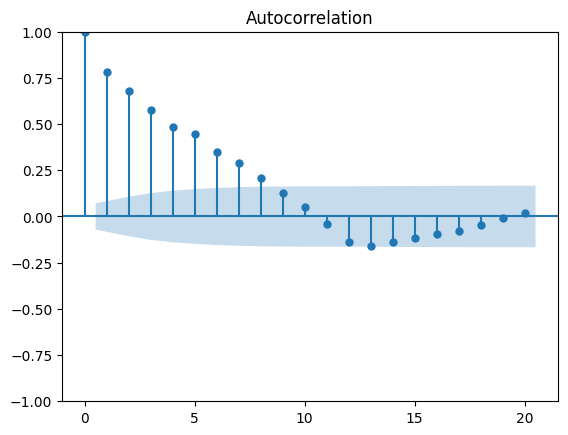

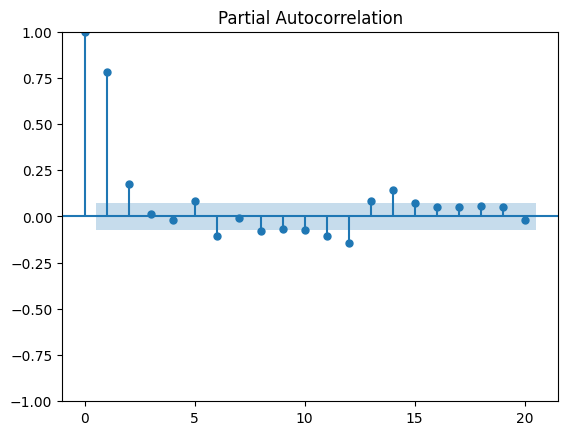

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['volume'],lags=20);
plot_pacf(df['volume'],lags=20);

Modelo ARIMA

AR - Autoregresivo, considrea observaciones pasadas

I - Diferenciación

MA - Media movil, considera la dependencia entre una observación y un error residual de observaciones pasadas

Ejemplo AIC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

best_aic = float('inf')
vest_ordet = none
salc_values = []

for n in range(1,20):
  try:
    model=ARIMA(train,order=(p,0,0))
    model_fit = model-fit()
    alc = model_fit.alc
    print(f"Ar({p}): AIC = {alc:.2f}")

    if alc = best

Ejemplo con CPI